<a href="https://colab.research.google.com/github/peter-callahan/vanderbilt/blob/main/Week_8_Homework_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.cs.toronto.edu/~frossard/post/linear_regression/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
data_ft = pd.read_csv('https://raw.githubusercontent.com/peter-callahan/vanderbilt/main/food_truck_data.txt', header=None, names=['pop', 'profit'])
data_hp = pd.read_csv('https://raw.githubusercontent.com/peter-callahan/vanderbilt/main/housing_price_data.txt', header=None, names=['size', 'bedrm', 'price'])

# Model and Functions


In [112]:
def gd_single_step(training_pair, thetas, x0=1):
    
    x1 = training_pair[0]
    y = training_pair[1]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = thetas[0] + thetas[1] * x1
    error = y_hat - y

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1])

    # gradients[0] is error term for x0
    # gradients[1] is same for x1
    return gradients


def gradient_descent(training_data, thetas, alpha=5e-3):
    total_error = 0
    overall_gradients = np.zeros(2)

    # compute the summation of gradients across all training examples
    for ex in training_data:
        gradients = gd_single_step(ex, thetas)

        total_error = total_error + gradients[0]
        overall_gradients = overall_gradients + gradients

    # update thetas
    theta_0, theta_1 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]

    return thetas, total_error

def ols(data):
    # initializing our inputs and outputs
    X = data.iloc[0].values
    Y = data.iloc[1].values

    # mean of our inputs and outputs
    x_mean = np.mean(X)
    y_mean = np.mean(Y)

    #total number of values
    n = len(X)

    # using the formula to calculate the b1 and b0
    numerator = 0
    denominator = 0

    for i in range(n):
        numerator = numerator + (X[i] - x_mean) * (Y[i] - y_mean)
        denominator = denominator + (X[i] - x_mean) ** 2
        
    b1 = numerator / denominator
    b0 = y_mean - (b1 * x_mean)

    return [b0, b1]

In [95]:
# thetas = [0.6, 0.86]

# ft_array = np.array(data_ft)
# thetas, epoch_error = gradient_descent(ft_array, thetas, alpha)
# print(epoch_error)
#thetas = gd_single_step(ft_array[0], thetas)

[3.6106274553863043, 0.31375469216767266]

In [96]:
# gradient_descent(ft_array, thetas)

# Training

In [97]:
data_ft.head()

,pop,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


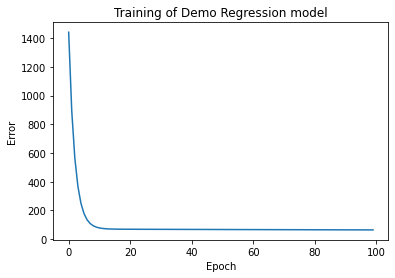

In [113]:
thetas = [0.3, 2.5]
# data_ft = data_ft.sort_values(by='pop')

ft_array = np.array(data_ft)

alpha = 0.00005

# prepare training
total_epochs = 100
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(ft_array, thetas, alpha)

    # store a history of errors
    error_traj[epoch] = epoch_error

# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

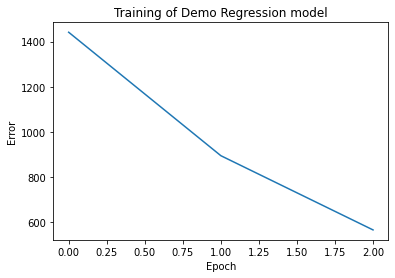

In [115]:
thetas_2 = [0.3, 2.5]
# data_ft = data_ft.sort_values(by='pop')

ft_array = np.array(data_ft)

alpha = 0.00005

# prepare training
total_epochs = 3
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas_2, epoch_error = gradient_descent(ft_array,  thetas_2, alpha)

    # store a history of errors
    error_traj[epoch] = epoch_error

# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');

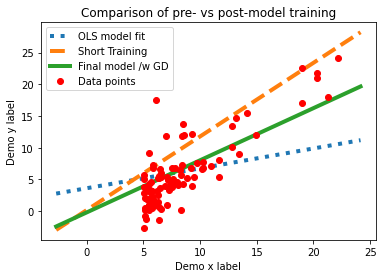

In [117]:
lin_pts = np.linspace(ft_array[:,1].min(), 
                      ft_array[:,1].max(), 
                      25) # for making the line

# lin_pts = ft_array[:,1]

# set initial parameters
old_thetas = ols(data_ft)

# Let's look at the original least squares
orig_mdl_pts = old_thetas[0] + lin_pts * old_thetas[1]
plt.plot(lin_pts, orig_mdl_pts, ':', linewidth=4, label='OLS model fit')
plt.legend()

# Let's look at the original least squares
mdl_pts_2 = thetas_2[0] + lin_pts * thetas_2[1]
plt.plot(lin_pts, mdl_pts_2, '--', linewidth=4, label='Short Training')
plt.legend()

# Let's look at the actual least squares
mdl_pts = thetas[0] + lin_pts * thetas[1]
plt.plot(lin_pts, mdl_pts, linewidth=4, label='Final model /w GD')
plt.legend()

# Let's plot the original points
plt.plot(ft_array[:,0], ft_array[:,1], 'ro', label='Data points') # 'ro' for red, circle
plt.legend()
plt.xlabel('Demo x label')
plt.ylabel('Demo y label')
plt.title('Comparison of pre- vs post-model training');